## Part 2

 
#### Here is the data set that contains the history of customer booking in a hotel.



#### There are three sections in this part
#### 1. Train a machine learning model (preferably with a neural network) that 
#### predicts the customer who is going to be checked in. Once done, please test 
#### the prediction with below test data.



#### 2. Do a thorough analysis on the results and the dataset with visualizations (please feel free to add creative ways of visualization here).

#### 3. Host/Deploy the results using any hosting service you want (streamlit/flask)


#### Importing the neccessary libraries

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

import warnings
warnings.filterwarnings('ignore')

In [104]:
pd.set_option('display.max_columns', None)
df=pd.read_csv(r'C:\Users\chandra shekhar\Desktop\NextLabs\train_data_evaluation_part_2.csv')
df

Unnamed: 0     ID Nationality   Age  DaysSinceCreation  \
0               0      1         PRT  51.0                150   
1               1      2         PRT   NaN               1095   
2               2      3         DEU  31.0               1095   
3               3      4         FRA  60.0               1095   
4               4      5         FRA  51.0               1095   
...           ...    ...         ...   ...                ...   
82575       82575  82576         SWE  51.0                 12   
82576       82576  82577         SWE  50.0                 12   
82577       82577  82578         DEU  50.0                 12   
82578       82578  82579         PRT   NaN                 12   
82579       82579  82580         DEU  17.0                 12   

       AverageLeadTime  LodgingRevenue  OtherRevenue  BookingsCanceled  \
0                   45          371.00         105.3                 1   
1                   61          280.00          53.0                 0   
2                    0            0.00           0.0                 0   
3                   93          240.00          60.0                 0   
4                    0            0.00           0.0                 0   
...                ...             ...           ...               ...   
82575              114          190.08           6.0                 0   
82576                0            0.00           0.0                 0   
82577               18          222.00         255.0                 0   
82578               11          255.00           9.0                 0   
82579                0            0.00           0.0                 0   

       BookingsNoShowed  BookingsCheckedIn  PersonsNights  RoomNights  \
0                     0                  3              8           5   
1                     0                  1             10           5   
2                     0                  0              0           0   
3                     0                  1             10           5   
4                     0                  0              0           0   
...                 ...                ...            ...         ...   
82575                 0                  1              6           3   
82576                 0                  0              0           0   
82577                 0                  1              3           3   
82578                 0                  1              3           3   
82579                 0                  0              0           0   

       DaysSinceLastStay  DaysSinceFirstStay    DistributionChannel  \
0                    151                1074              Corporate   
1                   1100                1100  Travel Agent/Operator   
2                     -1                  -1  Travel Agent/Operator   
3                   1100                1100  Travel Agent/Operator   
4                     -1                  -1  Travel Agent/Operator   
...                  ...                 ...                    ...   
82575                 15                  15  Travel Agent/Operator   
82576                 -1                  -1  Travel Agent/Operator   
82577                 15                  15  Travel Agent/Operator   
82578                 15                  15  Travel Agent/Operator   
82579                 -1                  -1  Travel Agent/Operator   

               MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
0                  Corporate            0           0                 0   
1      Travel Agent/Operator            0           0                 0   
2      Travel Agent/Operator            0           0                 0   
3      Travel Agent/Operator            0           0                 0   
4      Travel Agent/Operator            0           0                 0   
...                      ...          ...         ...               ...   
82575                  Other            0           0                 0   
82576  

### Description of each column

#### 'ID' - customer's ID.
#### 'Age' - customer's age.
#### 'Nationality' - Country of origin in ISO 3155–3:2013 format.
#### 'DaysSinceCreation' - number of days elapsed between the creation date and the last day of the extraction period.
#### 'AverageLeadTime' - average number of days elapsed between the customer's booking date and arrival date.
#### 'LodgingRevenue' - total amount spent on lodging expenses by the customer in euros.
#### 'OtherRevenue' - total amount spent on other expenses by the customer in euros.
#### 'BookingsCanceled' - number of bookings the customer made but subsequently canceled (informed the hotel).
#### 'BookingsNoShowed' - number of bookings the customer made but didn't show up.
#### 'BookingsCheckedIn' - number of bookings the customer made, and which end up with a staying.
#### 'PersonsNights' - total number of persons/nights that the custumer stayed at the hotel.
#### 'RoomNights' - total of room/nights the customer stayed at the hotel.
#### 'DaysSinceLastStay' - number of days elapsed between the last day of the extraction and the customer's last arrival date (-1 indicates the customer never stayed at the hotel).
#### 'DaysSinceFirstStay' - number of days elapsed between the last day of the extraction and the customer's first arrival date (-1 indicates the customer never stayed at the hotel).
#### 'DistributionChannel' - distribution channel usually used by the customer to make bookings at the hotel.
#### 'MarketSegment' - current market segment of a customer.
#### All of SR___ columns are indications if the customer usually asks for given extras/change.

### Basic data understanding

In [105]:
df.shape

(82580, 30)

In [106]:
df.isna().sum()

Unnamed: 0                 0
ID                         0
Nationality                0
Age                     3746
DaysSinceCreation          0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [58]:
df.duplicated().sum()

0

#### There are no duplicate values

In [59]:
df.columns

Index(['Unnamed: 0', 'ID', 'Nationality', 'Age', 'DaysSinceCreation',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [60]:
df['BookingsCheckedIn'].unique()

array([ 3,  1,  0,  9,  2, 11, 12,  7,  8,  5,  6,  4, 66, 15, 29, 25, 10,
       17, 13, 26, 23, 57, 40, 18, 14, 24, 19, 20, 34], dtype=int64)

In [61]:
df['BookingsCheckedIn'].value_counts()

1     61737
0     19394
2      1141
3       132
4        59
5        20
6        20
7        16
8        10
9         9
10        7
11        6
12        4
13        4
29        3
15        3
23        2
14        2
25        1
17        1
66        1
26        1
57        1
40        1
18        1
24        1
19        1
20        1
34        1
Name: BookingsCheckedIn, dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82580 entries, 0 to 82579
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            82580 non-null  int64  
 1   ID                    82580 non-null  int64  
 2   Nationality           82580 non-null  object 
 3   Age                   78834 non-null  float64
 4   DaysSinceCreation     82580 non-null  int64  
 5   AverageLeadTime       82580 non-null  int64  
 6   LodgingRevenue        82580 non-null  float64
 7   OtherRevenue          82580 non-null  float64
 8   BookingsCanceled      82580 non-null  int64  
 9   BookingsNoShowed      82580 non-null  int64  
 10  BookingsCheckedIn     82580 non-null  int64  
 11  PersonsNights         82580 non-null  int64  
 12  RoomNights            82580 non-null  int64  
 13  DaysSinceLastStay     82580 non-null  int64  
 14  DaysSinceFirstStay    82580 non-null  int64  
 15  DistributionChannel

### There are only 3 columns which are of object data type

In [107]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [108]:
df

ID Nationality   Age  DaysSinceCreation  AverageLeadTime  \
0          1         PRT  51.0                150               45   
1          2         PRT   NaN               1095               61   
2          3         DEU  31.0               1095                0   
3          4         FRA  60.0               1095               93   
4          5         FRA  51.0               1095                0   
...      ...         ...   ...                ...              ...   
82575  82576         SWE  51.0                 12              114   
82576  82577         SWE  50.0                 12                0   
82577  82578         DEU  50.0                 12               18   
82578  82579         PRT   NaN                 12               11   
82579  82580         DEU  17.0                 12                0   

       LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
0              371.00         105.3                 1                 0   
1              280.00          53.0                 0                 0   
2                0.00           0.0                 0                 0   
3              240.00          60.0                 0                 0   
4                0.00           0.0                 0                 0   
...               ...           ...               ...               ...   
82575          190.08           6.0                 0                 0   
82576            0.00           0.0                 0                 0   
82577          222.00         255.0                 0                 0   
82578          255.00           9.0                 0                 0   
82579            0.00           0.0                 0                 0   

       BookingsCheckedIn  PersonsNights  RoomNights  DaysSinceLastStay  \
0                      3              8           5                151   
1                      1             10           5               1100   
2                      0              0           0                 -1   
3                      1             10           5               1100   
4                      0              0           0                 -1   
...                  ...            ...         ...                ...   
82575                  1              6           3                 15   
82576                  0              0           0                 -1   
82577                  1              3           3                 15   
82578                  1              3           3                 15   
82579                  0              0           0                 -1   

       DaysSinceFirstStay    DistributionChannel          MarketSegment  \
0                    1074              Corporate              Corporate   
1                    1100  Travel Agent/Operator  Travel Agent/Operator   
2                      -1  Travel Agent/Operator  Travel Agent/Operator   
3                    1100  Travel Agent/Operator  Travel Agent/Operator   
4                      -1  Travel Agent/Operator  Travel Agent/Operator   
...                   ...                    ...                    ...   
82575                  15  Travel Agent/Operator                  Other   
82576                  -1  Travel Agent/Operator                  Other   
82577                  15  Travel Agent/Operator                  Other   
82578                  15  Travel Agent/Operator                  Other   
82579                  -1  Travel Agent/Operator                  Other   

       SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  SRBathtub  \
0                0           0                 0              0          0   
1                0           0                 0              0          0   
2                0           0                 0              0          0   
3                0           0                 0              0          0   
4                0           0                 0              0          0   
...       

In [109]:
df.drop('ID',axis=1,inplace=True)

In [110]:
df

Nationality   Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  \
0             PRT  51.0                150               45          371.00   
1             PRT   NaN               1095               61          280.00   
2             DEU  31.0               1095                0            0.00   
3             FRA  60.0               1095               93          240.00   
4             FRA  51.0               1095                0            0.00   
...           ...   ...                ...              ...             ...   
82575         SWE  51.0                 12              114          190.08   
82576         SWE  50.0                 12                0            0.00   
82577         DEU  50.0                 12               18          222.00   
82578         PRT   NaN                 12               11          255.00   
82579         DEU  17.0                 12                0            0.00   

       OtherRevenue  BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  \
0             105.3                 1                 0                  3   
1              53.0                 0                 0                  1   
2               0.0                 0                 0                  0   
3              60.0                 0                 0                  1   
4               0.0                 0                 0                  0   
...             ...               ...               ...                ...   
82575           6.0                 0                 0                  1   
82576           0.0                 0                 0                  0   
82577         255.0                 0                 0                  1   
82578           9.0                 0                 0                  1   
82579           0.0                 0                 0                  0   

       PersonsNights  RoomNights  DaysSinceLastStay  DaysSinceFirstStay  \
0                  8           5                151                1074   
1                 10           5               1100                1100   
2                  0           0                 -1                  -1   
3                 10           5               1100                1100   
4                  0           0                 -1                  -1   
...              ...         ...                ...                 ...   
82575              6           3                 15                  15   
82576              0           0                 -1                  -1   
82577              3           3                 15                  15   
82578              3           3                 15                  15   
82579              0           0                 -1                  -1   

         DistributionChannel          MarketSegment  SRHighFloor  SRLowFloor  \
0                  Corporate              Corporate            0           0   
1      Travel Agent/Operator  Travel Agent/Operator            0           0   
2      Travel Agent/Operator  Travel Agent/Operator            0           0   
3      Travel Agent/Operator  Travel Agent/Operator            0           0   
4      Travel Agent/Operator  Travel Agent/Operator            0           0   
...                      ...                    ...          ...         ...   
82575  Travel Agent/Operator                  Other            0           0   
82576  Travel Agent/Operator                  Other            0           0   
82577  Travel Agent/Operator                  Other            0           0   
82578  Travel Agent/Operator                  Other            0           0   
82579  Travel Agent/Operator                  Other            0           0   

       SRAccessibleRoom  SRMediumFloor  SRBathtub  SRShower  SRCrib  \
0                     0              0          0         0       0   
1                     0              0          0         0       0   
2                     0              0       

In [13]:
df['Nationality'].value_counts()

FRA    12307
PRT    11382
DEU    10164
GBR     8610
ESP     4864
       ...  
GNQ        1
GIN        1
SWZ        1
SOM        1
NPL        1
Name: Nationality, Length: 188, dtype: int64

In [111]:
df.dropna(inplace=True)

In [112]:
df.shape

(78834, 28)

### Since total null values 3746 is very less(just 4.5%) compared to training data we can drop them

In [113]:
df['DistributionChannel'].value_counts()

Travel Agent/Operator      64949
Direct                     11108
Corporate                   2285
Electronic Distribution      492
Name: DistributionChannel, dtype: int64

In [114]:
df['MarketSegment'].value_counts()

Other                    45650
Travel Agent/Operator    11065
Direct                   10759
Groups                    8861
Corporate                 1882
Complementary              395
Aviation                   222
Name: MarketSegment, dtype: int64

#### These columns like Nationality ,Market segment,Distribution channel can be Label encoded

### 3 new columns are created for getting more insights regarding the data

#### 'TotalRevenue' - total amount spent by a customer on lodging (room, crib, and other related lodging expenses) and other expenses such as food, beverage, spa etc.
#### 'PersonRoomNights' - created by dividing 'PersonsNights' by 'RoomNights' to get the estimated number of people per room.
#### 'AgeGroups' - age groups of '0-20', '21-40', '41-60', '60+' with missing values grouped as 'Unknown' (that includes negative values as well)

In [115]:
df['TotalRevenue'] = df['LodgingRevenue'] + df['OtherRevenue']

In [116]:
df['PersonsRoomNight'] = df['PersonsNights'] / df['RoomNights']
df['PersonsRoomNight'].fillna(0, inplace=True)

In [117]:
df['AgeGroups'] = pd.cut(df['Age'], bins=[-1, 20, 40, 60, 125], labels=['0-20', '21-40', '41-60', '60+'])
df['AgeGroups'] = df['AgeGroups'].cat.add_categories('Unknown')
df['AgeGroups'].fillna('Unknown', inplace=True)

avg_by_age = df.groupby('AgeGroups').mean()
sum_by_age = df.groupby('AgeGroups').sum()
avg_by_nat = df.groupby('Nationality').mean()

## Exploratory Data Analysis

#### Visualizations

In [118]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.kdeplot(df['Age'], shade=True, color='#AB49A2', alpha=0.8, linewidth=3, edgecolor='black')
sns.despine()
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')
ax.set_ylabel('')
ax.set_xlabel('Age')
ax.grid(False)
# ax.yaxis.set_ticklabels([])
ax.grid(which='both', axis='y', color='black', linestyle=':', dashes=(2,10))
ax.text(60, 0.025, 'Age Distribution.', fontsize=23, fontweight='bold', fontfamily='monospace')
ax.text(60, 0.0222, 'Most of the customers is \nbetween 30 and 60 years old.', fontsize=13, fontfamily='monospace')
plt.show()

In [119]:
df['Age'].skew()

-0.15606624299969957

### The Age data is almost normally distributed

In [120]:
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='Age'>

#### A function to determine outliers

In [128]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1
   upper_limit=q3+1.5*IQR
   lower_limit=q1-1.5*IQR
   print("IQR is",IQR)
   print("Upperlimit",upper_limit)
   print("lowerlimit",lower_limit)
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   

   

   return outliers

In [130]:
outliers_age=find_outliers_IQR(df['Age'])
outliers_age

IQR is 23.0
Upperlimit 91.5
lowerlimit -0.5


2053      -7.0
2469      -7.0
3282     114.0
5128      -9.0
6751     -11.0
8360      -7.0
8628     -10.0
9919      -6.0
10662    -10.0
10694    -10.0
10755     -6.0
14321    -10.0
14687     -1.0
15104    -11.0
16974     -1.0
18910    110.0
19865     92.0
20328     -1.0
20405     -9.0
25587    113.0
44518    113.0
45082    114.0
53284    122.0
57342     -6.0
58036    113.0
62677     96.0
62956     92.0
64239    109.0
67345     92.0
Name: Age, dtype: float64

#### There are 29 outliers in the Age column

#### we need to remove these outliers

In [133]:

df['Age'].min(),df['Age'].max()

(-11.0, 122.0)

In [136]:
sum(df['Age']<1)  ### Negative values in Age column does not mean anything

57

In [138]:
df.drop([2053,2469,3282,5128,6751,8360,8628,9919,10662,10694,10755,14321,14687,15104,16974,18910,19865,20328,20405,25587,44518,45082,53284,57342,58036,62677,62956,64239,67345],axis=0, inplace=True)


In [139]:
df.shape
        

(78805, 31)

### Boxplot after removing the outliers

<AxesSubplot:xlabel='Age'>

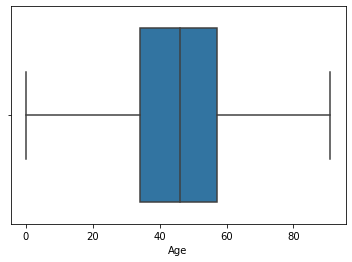

In [140]:
sns.boxplot(df['Age'])

In [142]:
df2=df[df['Age']<1]

In [144]:
for value in df2.index:
    df.drop(value,axis=0,inplace=True)
    

In [145]:
df.shape

(78765, 31)

In [146]:
df

Nationality   Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  \
0             PRT  51.0                150               45          371.00   
2             DEU  31.0               1095                0            0.00   
3             FRA  60.0               1095               93          240.00   
4             FRA  51.0               1095                0            0.00   
5             JPN  54.0               1095               58          230.00   
...           ...   ...                ...              ...             ...   
82574         PRT  41.0                 12                7           75.18   
82575         SWE  51.0                 12              114          190.08   
82576         SWE  50.0                 12                0            0.00   
82577         DEU  50.0                 12               18          222.00   
82579         DEU  17.0                 12                0            0.00   

       OtherRevenue  BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  \
0             105.3                 1                 0                  3   
2               0.0                 0                 0                  0   
3              60.0                 0                 0                  1   
4               0.0                 0                 0                  0   
5              24.0                 0                 0                  1   
...             ...               ...               ...                ...   
82574           7.0                 0                 0                  1   
82575           6.0                 0                 0                  1   
82576           0.0                 0                 0                  0   
82577         255.0                 0                 0                  1   
82579           0.0                 0                 0                  0   

       PersonsNights  RoomNights  DaysSinceLastStay  DaysSinceFirstStay  \
0                  8           5                151                1074   
2                  0           0                 -1                  -1   
3                 10           5               1100                1100   
4                  0           0                 -1                  -1   
5                  4           2               1097                1097   
...              ...         ...                ...                 ...   
82574              1           1                 13                  13   
82575              6           3                 15                  15   
82576              0           0                 -1                  -1   
82577              3           3                 15                  15   
82579              0           0                 -1                  -1   

         DistributionChannel          MarketSegment  SRHighFloor  SRLowFloor  \
0                  Corporate              Corporate            0           0   
2      Travel Agent/Operator  Travel Agent/Operator            0           0   
3      Travel Agent/Operator  Travel Agent/Operator            0           0   
4      Travel Agent/Operator  Travel Agent/Operator            0           0   
5      Travel Agent/Operator                  Other            0           0   
...                      ...                    ...          ...         ...   
82574  Travel Agent/Operator                  Other            0           0   
82575  Travel Agent/Operator                  Other            0           0   
82576  Travel Agent/Operator                  Other            0           0   
82577  Travel Agent/Operator                  Other            0           0   
82579  Travel Agent/Operator                  Other            0           0   

       SRAccessibleRoom  SRMediumFloor  SRBathtub  SRShower  SRCrib  \
0                     0              0          0         0       0   
2                     0              0          0         0       0   
3                     0              0       

### To check the distribution of nationality

In [153]:

ax = plt.subplots(figsize=(12, 10))

sns.countplot(data=df, y='Nationality', 
              order=df['Nationality'].value_counts(sort=True).index[:20], 
              color='#0000FF', alpha=0.85, linewidth=2, edgecolor='black')
plt.show()

#### France and Germany are the most frequent nationalities in the data set

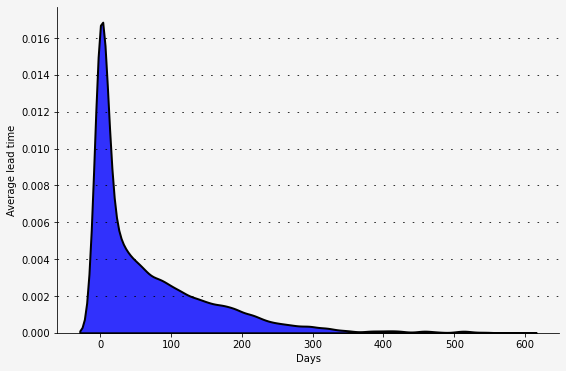

In [158]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.kdeplot(df['AverageLeadTime'], shade=True, color='#0000FF', alpha=0.8, linewidth=2, edgecolor='black')
sns.despine()
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')
ax.set_ylabel('Average lead time')
ax.set_xlabel('Days')
ax.grid(False)
ax.grid(which='both', axis='y', color='black', linestyle=':', dashes=(2,10))
plt.show()


#### The above graph depicts average number of days elapsed between the customer's booking date and arrival date

In [161]:
df['AverageLeadTime'].mean(),df['AverageLeadTime'].median()

(67.18944962864217, 31.0)

In [162]:
df['AverageLeadTime'].skew()

1.8960553204400221

### Lets analyse how the average number of days elapsed between the customer's booking date and arrival date varies with different age groups

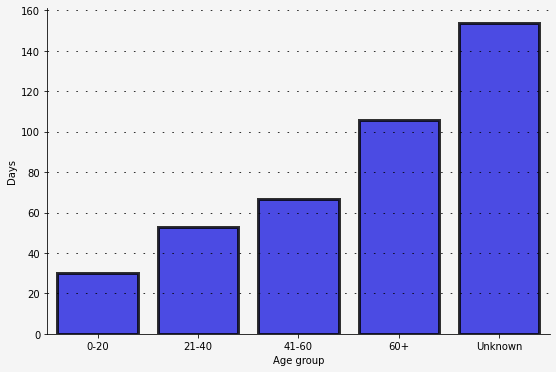

In [165]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.barplot(data=avg_by_age, x=avg_by_age.index, y='AverageLeadTime', 
            color='#0000FF', alpha=0.8, linewidth=3, edgecolor='k')
sns.despine()
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')
ax.set_xlabel('Age group')
ax.set_ylabel('Days')
ax.grid(False)
ax.grid(which='both', axis='y', color='black', linestyle=':', dashes=(2,10))
plt.show()

### The inference is older people from dataset tend to book the hotels earlier

### lets analyse how the total expenses varies between different age groups

In [168]:
fig, ax = plt.subplots(figsize=(12, 5))
fig.set_facecolor('#F5F5F5')

sns.scatterplot(x=df['Age'], y=df['TotalRevenue'], color='#0000FF')
# sns.kdeplot(x=df['Age'], y=df['TotalRevenue'], color='k')
ax.set_facecolor('#F5F5F5')
ax.set_xlabel('Age')
ax.set_ylabel('Total amount spent')
plt.show()

### Inference :Spendings across our dataset are fairly normally distributed.

In [170]:
fig = plt.figure(figsize=(15, 5))
fig.set_facecolor('#F5F5F5')

ax = [None for _ in range(3)]

ax[0] = plt.subplot2grid((1,3), (0,0), colspan=1)
ax[1] = plt.subplot2grid((1,3), (0,1), colspan=1)
ax[2] = plt.subplot2grid((1,3), (0,2), colspan=1)

sns.barplot(data=avg_by_age, x=avg_by_age.index, y='LodgingRevenue',
            alpha=0.85, linewidth=2, edgecolor='black', ax=ax[0], palette=['#AB49A2', 
                                                                          '#AB49A2', 
                                                                          '#B1EDE8', 
                                                                          '#AB49A2'])
ax[0].set_title('Lodging')
ax[0].set_ylabel('Amount spent')

sns.barplot(data=avg_by_age, x=avg_by_age.index, y='OtherRevenue', 
            alpha=0.85, linewidth=2, edgecolor='black', ax=ax[1], palette=['#AB49A2', 
                                                                          '#AB49A2', 
                                                                           '#B1EDE8', 
                                                                          '#AB49A2'])
ax[0].set_title('Lodging')
ax[0].set_ylabel('Amount spent')

sns.barplot(data=avg_by_age, x=avg_by_age.index, y='OtherRevenue', 
            alpha=0.85, linewidth=2, edgecolor='black', ax=ax[1], palette=['#AB49A2', 
                                                                          '#AB49A2', 
                                                                          '#AB49A2', 
                                                                          '#B1EDE8'])
ax[1].set_title('Other')
ax[1].set_ylabel('')

sns.barplot(data=avg_by_age, x=avg_by_age.index, y='TotalRevenue', 
            alpha=0.8, linewidth=2, edgecolor='black', ax=ax[2], palette=['#AB49A2', 
                                                                          '#AB49A2', 
                                                                          '#B1EDE8', 
                                                                          '#AB49A2'])
ax[2].set_title('Total')
ax[2].set_ylabel('')

for i in range(3):
    sns.despine()
    ax[i].set_facecolor('#F5F5F5')
    ax[i].set_xlabel('Age group')
    ax[i].xaxis.grid(False, which='major')
    ax[i].yaxis.grid(True, linestyle=':', color='black', dashes=(3, 8))

    plt.suptitle('Average spendings in € by age group', fontsize=20, fontweight='bold', fontfamily='monospace')
fig.tight_layout()
plt.show()

### Inference: Lodging expense(average) is more for age group 41-60
### Other expenses(average) is more for age group 60+

### Lets analyse the customers based on BookingCheckedin,BookingsNotshowed,Bookingscancelled

In [178]:
fig = plt.figure(figsize=(12, 10))
fig.set_facecolor('#F5F5F5')

ax = [None for _ in range(6)] 

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=4)
ax[1] = plt.subplot2grid((3,4), (1,0), colspan=2)
ax[2] = plt.subplot2grid((3,4), (1,2), colspan=2)

g1 = sns.countplot(data=df, x='BookingsCanceled',
            color='#0000FF', alpha=0.85, linewidth=2, edgecolor='black', ax=ax[1])

for p in g1.patches:
    g1.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., \
                                               p.get_height()), ha = 'center', va = 'center', \
                                               xytext = (0, 10), textcoords = 'offset points')
ax[1].set_title('Canceled bookings')

ax[1].set_ylabel('Count')
ax[1].set_xlabel('No. of cancelations')

g2 = sns.countplot(data=df, x='BookingsNoShowed',
            color='#FF0000', alpha=0.85, linewidth=2, edgecolor='black', ax=ax[2])

for p in g2.patches:
    g2.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., \
                                               p.get_height()), ha = 'center', va = 'center', \
                                               xytext = (0, 10), textcoords = 'offset points')
ax[2].set_title('"Bookings Notshowed"')
ax[2].set_ylabel('')
ax[2].set_xlabel('Times customer didn\'t show')
ax[2].text(1.5, 70000, 'No-show.', fontsize=15, fontweight='bold', fontfamily='monospace')
ax[2].text(1.5, 50000, 'is when the customer did not \ncancel, but did not checked-in \nto stay at the hotel neither.', 
           fontsize=10, fontfamily='monospace')
g3 = sns.countplot(data=df, x='BookingsCheckedIn',
            color='#00FF00', alpha=0.85, linewidth=2, edgecolor='black', ax=ax[0])

for p in g3.patches:
    g3.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., \
                                               p.get_height()), ha = 'center', va = 'center', \
                                               xytext = (0, 10), textcoords = 'offset points')
ax[0].set_title('Booking checked-in')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('No. of check-ins per customer')

 
for i in range(3):
    sns.despine()
    ax[i].set_facecolor('#F5F5F5')
    ax[i].xaxis.grid(False, which='major')
    ax[i].yaxis.grid(True, linestyle=':', color='black', dashes=(3, 8))


plt.tight_layout()
plt.show()

### Inference: Majority of customers have only checked in once but there are some extreme cases also
### Majority of the customers have not cancelled their bookings
### and also majoirty have arrived instead of not showing up


### Lets analyse the marketsegment and distribution channel



In [182]:
df['DistributionChannel'].value_counts()

Travel Agent/Operator      64895
Direct                     11096
Corporate                   2283
Electronic Distribution      491
Name: DistributionChannel, dtype: int64

In [183]:
df['MarketSegment'].value_counts()

Other                    45613
Travel Agent/Operator    11056
Direct                   10745
Groups                    8853
Corporate                 1881
Complementary              395
Aviation                   222
Name: MarketSegment, dtype: int64

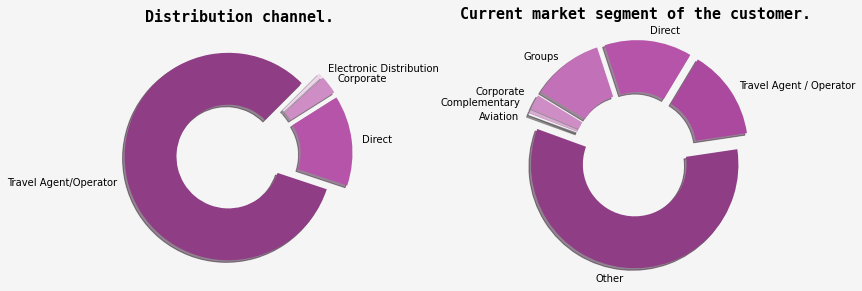

In [184]:
dist_channels = df['DistributionChannel'].value_counts()
market_segments = df['MarketSegment'].value_counts()
ms_labels = ['Other', 'Travel Agent / Operator', 'Direct', 'Groups', 'Corporate\n', 'Complementary\n', '\nAviation']
fig = plt.figure(figsize=(12, 6), facecolor='#F5F5F5')
gs = fig.add_gridspec(1, 2)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

cmap1 = ['#8F3D84', '#B654A9', '#CE8DC5', '#EDD4EA',]
cmap2 = ['#8F3D84', '#AB499E', '#B654A9', '#C270B7', '#CE8DC5', '#DAA9D4', '#F9F1F8']

ax0.pie(dist_channels, labels=dist_channels.index, explode=[0.1, 0.1, 0.1, 0.1], 
        colors=cmap1, wedgeprops=dict(width=0.5), shadow=True, startangle=45)

ax0.text(-0.9, 1.28, 'Distribution channel.', fontsize=15, fontweight='bold', fontfamily='monospace')



ax1.pie(market_segments, labels=ms_labels, explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], 
        colors=cmap2, wedgeprops=dict(width=0.5), shadow=True, startangle=160)
ax1.set_title('Current market segment of the customer.', fontsize=15, fontweight='bold', fontfamily='monospace')
# ax1.text(-0.9, 1.25, 'Market segment', fontsize=15, fontweight='bold', fontfamily='monospace')
# ax1.text(-1.2, 1.07, 'Current market segment of the customer.', 
#          fontsize=8, fontfamily='monospace')


plt.tight_layout()
plt.show()

### Inference : Most of the customers have booked hotel using Travel Agent/Operator

### Lets analyse how many customers have asked for extra requirements 

In [185]:
requests_cols = ['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 
                 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 
                 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']

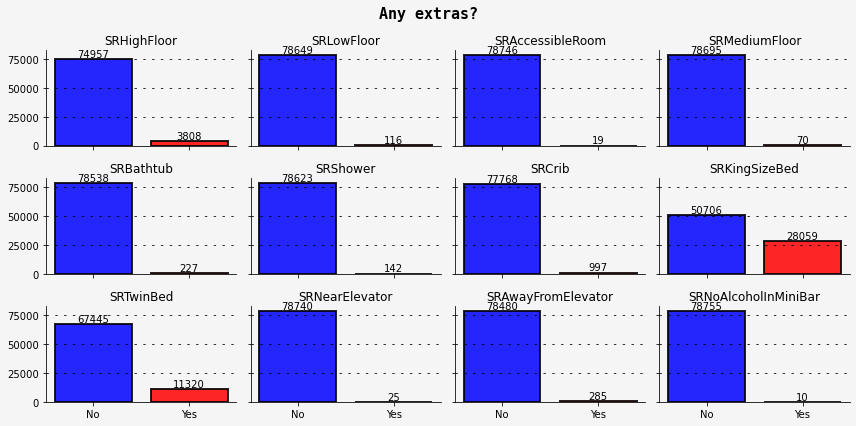

In [187]:
fig, axes = plt.subplots(3, 4, figsize=(12, 6), sharex=True, sharey=True, squeeze=False)
fig.set_facecolor('#F5F5F5')

for i, ax in enumerate(axes.flatten()):
    col = requests_cols[i]
    counts = df[col].value_counts()
    g = ax.bar(counts.index, counts.values, color=['#0000FF', '#FF0000'], 
               alpha=0.85, edgecolor='k', linewidth=2)
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., \
                                               p.get_height()), ha = 'center', va = 'top', \
                                               xytext = (0, 10), textcoords = 'offset points')
    ax.set_title(f'{col}')
    ax.set_facecolor('#F5F5F5')
    plt.xticks([0, 1], ['No', 'Yes'])
    ax.xaxis.grid(False, which='major')
    ax.yaxis.grid(True, linestyle=':', color='black', dashes=(3, 8))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
plt.suptitle('Any extras?', fontsize=15, fontweight='bold', fontfamily='monospace')
plt.tight_layout()
plt.show()

### Inference: Majority of the customers have not asked for any extra requirements
### A small proportion of customers have asked for Kingsizebed ,Twinbed and requirement for moving to a high floor

In [195]:
df.drop(['level_0','index'],axis=1,inplace=True)

In [196]:
df

Nationality   Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  \
0             PRT  51.0                150               45          371.00   
1             DEU  31.0               1095                0            0.00   
2             FRA  60.0               1095               93          240.00   
3             FRA  51.0               1095                0            0.00   
4             JPN  54.0               1095               58          230.00   
...           ...   ...                ...              ...             ...   
78760         PRT  41.0                 12                7           75.18   
78761         SWE  51.0                 12              114          190.08   
78762         SWE  50.0                 12                0            0.00   
78763         DEU  50.0                 12               18          222.00   
78764         DEU  17.0                 12                0            0.00   

       OtherRevenue  BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  \
0             105.3                 1                 0                  3   
1               0.0                 0                 0                  0   
2              60.0                 0                 0                  1   
3               0.0                 0                 0                  0   
4              24.0                 0                 0                  1   
...             ...               ...               ...                ...   
78760           7.0                 0                 0                  1   
78761           6.0                 0                 0                  1   
78762           0.0                 0                 0                  0   
78763         255.0                 0                 0                  1   
78764           0.0                 0                 0                  0   

       PersonsNights  RoomNights  DaysSinceLastStay  DaysSinceFirstStay  \
0                  8           5                151                1074   
1                  0           0                 -1                  -1   
2                 10           5               1100                1100   
3                  0           0                 -1                  -1   
4                  4           2               1097                1097   
...              ...         ...                ...                 ...   
78760              1           1                 13                  13   
78761              6           3                 15                  15   
78762              0           0                 -1                  -1   
78763              3           3                 15                  15   
78764              0           0                 -1                  -1   

         DistributionChannel          MarketSegment  SRHighFloor  SRLowFloor  \
0                  Corporate              Corporate            0           0   
1      Travel Agent/Operator  Travel Agent/Operator            0           0   
2      Travel Agent/Operator  Travel Agent/Operator            0           0   
3      Travel Agent/Operator  Travel Agent/Operator            0           0   
4      Travel Agent/Operator                  Other            0           0   
...                      ...                    ...          ...         ...   
78760  Travel Agent/Operator                  Other            0           0   
78761  Travel Agent/Operator                  Other            0           0   
78762  Travel Agent/Operator                  Other            0           0   
78763  Travel Agent/Operator                  Other            0           0   
78764  Travel Agent/Operator                  Other            0           0   

       SRAccessibleRoom  SRMediumFloor  SRBathtub  SRShower  SRCrib  \
0                     0              0          0         0       0   
1                     0              0          0         0       0   
2                     0              0       

#### The columns such as PersonsRoomNight,AgeGroups,LodgingRevenue,OtherRevenue can be removed since we have total revenue of the customer

In [198]:
df.drop(['PersonsRoomNight','AgeGroups','LodgingRevenue','OtherRevenue'],axis=1,inplace=True)

In [199]:
df

Nationality   Age  DaysSinceCreation  AverageLeadTime  BookingsCanceled  \
0             PRT  51.0                150               45                 1   
1             DEU  31.0               1095                0                 0   
2             FRA  60.0               1095               93                 0   
3             FRA  51.0               1095                0                 0   
4             JPN  54.0               1095               58                 0   
...           ...   ...                ...              ...               ...   
78760         PRT  41.0                 12                7                 0   
78761         SWE  51.0                 12              114                 0   
78762         SWE  50.0                 12                0                 0   
78763         DEU  50.0                 12               18                 0   
78764         DEU  17.0                 12                0                 0   

       BookingsNoShowed  BookingsCheckedIn  PersonsNights  RoomNights  \
0                     0                  3              8           5   
1                     0                  0              0           0   
2                     0                  1             10           5   
3                     0                  0              0           0   
4                     0                  1              4           2   
...                 ...                ...            ...         ...   
78760                 0                  1              1           1   
78761                 0                  1              6           3   
78762                 0                  0              0           0   
78763                 0                  1              3           3   
78764                 0                  0              0           0   

       DaysSinceLastStay  DaysSinceFirstStay    DistributionChannel  \
0                    151                1074              Corporate   
1                     -1                  -1  Travel Agent/Operator   
2                   1100                1100  Travel Agent/Operator   
3                     -1                  -1  Travel Agent/Operator   
4                   1097                1097  Travel Agent/Operator   
...                  ...                 ...                    ...   
78760                 13                  13  Travel Agent/Operator   
78761                 15                  15  Travel Agent/Operator   
78762                 -1                  -1  Travel Agent/Operator   
78763                 15                  15  Travel Agent/Operator   
78764                 -1                  -1  Travel Agent/Operator   

               MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
0                  Corporate            0           0                 0   
1      Travel Agent/Operator            0           0                 0   
2      Travel Agent/Operator            0           0                 0   
3      Travel Agent/Operator            0           0                 0   
4                      Other            0           0                 0   
...                      ...          ...         ...               ...   
78760                  Other            0           0                 0   
78761                  Other            0           0                 0   
78762                  Other            0           0                 0   
78763                  Other            0           0                 0   
78764                  Other            0           0                 0   

       SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  \
0                  0          0         0       0              0          0   
1                  0          0         0       0              0          0   
2                  0          0         0       0              0          0   
3                  0          0         0       0              0          0   
4      

### The columns such as Nationality ,Distributionchannel,Marketsegment has to be Label Encoded

In [200]:
from sklearn.preprocessing import LabelEncoder

In [201]:
labelencoder=LabelEncoder()


In [202]:
df['Nationality']=labelencoder.fit_transform(df['Nationality'])
df['DistributionChannel']=labelencoder.fit_transform(df['DistributionChannel'])
df['MarketSegment']=labelencoder.fit_transform(df['MarketSegment'])

In [203]:
df

Nationality   Age  DaysSinceCreation  AverageLeadTime  \
0              137  51.0                150               45   
1               43  31.0               1095                0   
2               57  60.0               1095               93   
3               57  51.0               1095                0   
4               87  54.0               1095               58   
...            ...   ...                ...              ...   
78760          137  41.0                 12                7   
78761          157  51.0                 12              114   
78762          157  50.0                 12                0   
78763           43  50.0                 12               18   
78764           43  17.0                 12                0   

       BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  PersonsNights  \
0                     1                 0                  3              8   
1                     0                 0                  0              0   
2                     0                 0                  1             10   
3                     0                 0                  0              0   
4                     0                 0                  1              4   
...                 ...               ...                ...            ...   
78760                 0                 0                  1              1   
78761                 0                 0                  1              6   
78762                 0                 0                  0              0   
78763                 0                 0                  1              3   
78764                 0                 0                  0              0   

       RoomNights  DaysSinceLastStay  DaysSinceFirstStay  DistributionChannel  \
0               5                151                1074                    0   
1               0                 -1                  -1                    3   
2               5               1100                1100                    3   
3               0                 -1                  -1                    3   
4               2               1097                1097                    3   
...           ...                ...                 ...                  ...   
78760           1                 13                  13                    3   
78761           3                 15                  15                    3   
78762           0                 -1                  -1                    3   
78763           3                 15                  15                    3   
78764           0                 -1                  -1                    3   

       MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
0                  2            0           0                 0   
1                  6            0           0                 0   
2                  6            0           0                 0   
3                  6            0           0                 0   
4                  5            0           0                 0   
...              ...          ...         ...               ...   
78760              5            0           0                 0   
78761              5            0           0                 0   
78762              5            0           0                 0   
78763              5            0           0                 0   
78764              5            0           0                 0   

       SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  \
0                  0          0         0       0              0          0   
1                  0          0         0       0              0          0   
2                  0          0         0       0              0          0   
3                  0          0         0       0              0          0   
4                  0          0         0       0              0          0   
...              ...        ...      

In [204]:
df['DistributionChannel'].value_counts()

3    64895
1    11096
0     2283
2      491
Name: DistributionChannel, dtype: int64

In [205]:
df['MarketSegment'].value_counts()

5    45613
6    11056
3    10745
4     8853
2     1881
1      395
0      222
Name: MarketSegment, dtype: int64

### Let us consider BookingscheckedIn column as the output variable which tells whether the customer has stayed in the hotel after booking

### Since the aim is to predict whether the customer will check in or not ,lets consider only two variables

In [207]:
df['BookingsCheckedIn'].value_counts()

1     58896
0     18526
2      1059
3       118
4        56
5        20
6        18
7        15
8        10
9         9
10        7
11        6
13        4
12        3
14        2
15        2
29        2
23        2
20        1
24        1
40        1
18        1
25        1
57        1
26        1
17        1
66        1
34        1
Name: BookingsCheckedIn, dtype: int64

### 0-The customer has not checked in
### 1 -The customer has checked in

In [209]:
def checking(x):
    if x>=2:
        return 1
    elif x==0:
        return 0
    else :
        return 1

In [210]:
df['BookingsCheckedIn']=df['BookingsCheckedIn'].apply(checking)

In [211]:
df

Nationality   Age  DaysSinceCreation  AverageLeadTime  \
0              137  51.0                150               45   
1               43  31.0               1095                0   
2               57  60.0               1095               93   
3               57  51.0               1095                0   
4               87  54.0               1095               58   
...            ...   ...                ...              ...   
78760          137  41.0                 12                7   
78761          157  51.0                 12              114   
78762          157  50.0                 12                0   
78763           43  50.0                 12               18   
78764           43  17.0                 12                0   

       BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  PersonsNights  \
0                     1                 0                  1              8   
1                     0                 0                  0              0   
2                     0                 0                  1             10   
3                     0                 0                  0              0   
4                     0                 0                  1              4   
...                 ...               ...                ...            ...   
78760                 0                 0                  1              1   
78761                 0                 0                  1              6   
78762                 0                 0                  0              0   
78763                 0                 0                  1              3   
78764                 0                 0                  0              0   

       RoomNights  DaysSinceLastStay  DaysSinceFirstStay  DistributionChannel  \
0               5                151                1074                    0   
1               0                 -1                  -1                    3   
2               5               1100                1100                    3   
3               0                 -1                  -1                    3   
4               2               1097                1097                    3   
...           ...                ...                 ...                  ...   
78760           1                 13                  13                    3   
78761           3                 15                  15                    3   
78762           0                 -1                  -1                    3   
78763           3                 15                  15                    3   
78764           0                 -1                  -1                    3   

       MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
0                  2            0           0                 0   
1                  6            0           0                 0   
2                  6            0           0                 0   
3                  6            0           0                 0   
4                  5            0           0                 0   
...              ...          ...         ...               ...   
78760              5            0           0                 0   
78761              5            0           0                 0   
78762              5            0           0                 0   
78763              5            0           0                 0   
78764              5            0           0                 0   

       SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  \
0                  0          0         0       0              0          0   
1                  0          0         0       0              0          0   
2                  0          0         0       0              0          0   
3                  0          0         0       0              0          0   
4                  0          0         0       0              0          0   
...              ...        ...      

In [316]:
df.to_csv('file1.csv')

In [218]:
df['BookingsCheckedIn'].value_counts()

1    60239
0    18526
Name: BookingsCheckedIn, dtype: int64

### Lets check the relationship between each columns using chi square test

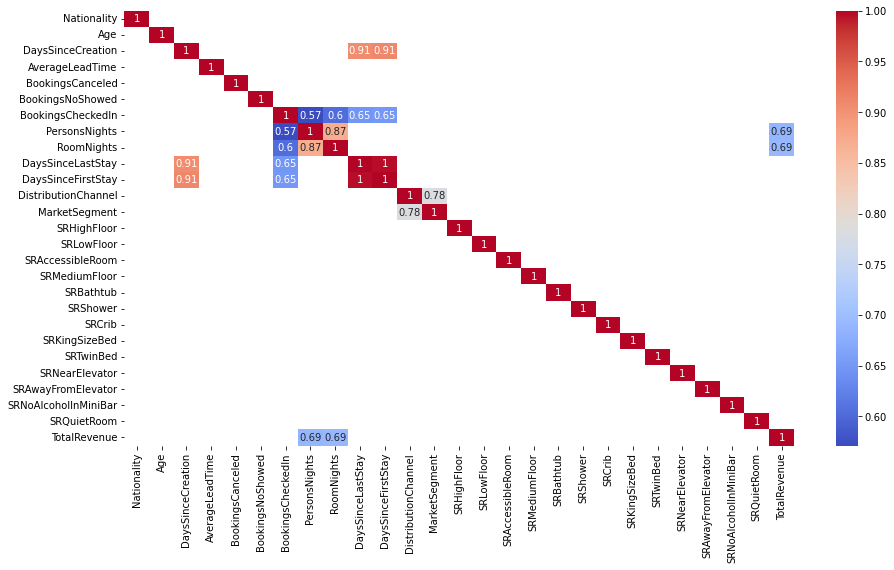

In [228]:


corr = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(data = corr[corr>0.5], annot = True, cmap = 'coolwarm')
plt.show()

### Split the data into X and Y where X represents the predictor variables and Y represents the output variable

In [250]:
X_train=df.drop('BookingsCheckedIn',axis=1)

In [251]:
Y_train=df[['BookingsCheckedIn']]

In [252]:
X_train

Nationality   Age  DaysSinceCreation  AverageLeadTime  \
0              137  51.0                150               45   
1               43  31.0               1095                0   
2               57  60.0               1095               93   
3               57  51.0               1095                0   
4               87  54.0               1095               58   
...            ...   ...                ...              ...   
78760          137  41.0                 12                7   
78761          157  51.0                 12              114   
78762          157  50.0                 12                0   
78763           43  50.0                 12               18   
78764           43  17.0                 12                0   

       BookingsCanceled  BookingsNoShowed  PersonsNights  RoomNights  \
0                     1                 0              8           5   
1                     0                 0              0           0   
2                     0                 0             10           5   
3                     0                 0              0           0   
4                     0                 0              4           2   
...                 ...               ...            ...         ...   
78760                 0                 0              1           1   
78761                 0                 0              6           3   
78762                 0                 0              0           0   
78763                 0                 0              3           3   
78764                 0                 0              0           0   

       DaysSinceLastStay  DaysSinceFirstStay  DistributionChannel  \
0                    151                1074                    0   
1                     -1                  -1                    3   
2                   1100                1100                    3   
3                     -1                  -1                    3   
4                   1097                1097                    3   
...                  ...                 ...                  ...   
78760                 13                  13                    3   
78761                 15                  15                    3   
78762                 -1                  -1                    3   
78763                 15                  15                    3   
78764                 -1                  -1                    3   

       MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
0                  2            0           0                 0   
1                  6            0           0                 0   
2                  6            0           0                 0   
3                  6            0           0                 0   
4                  5            0           0                 0   
...              ...          ...         ...               ...   
78760              5            0           0                 0   
78761              5            0           0                 0   
78762              5            0           0                 0   
78763              5            0           0                 0   
78764              5            0           0                 0   

       SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  \
0                  0          0         0       0              0          0   
1                  0          0         0       0              0          0   
2                  0          0         0       0              0          0   
3                  0          0         0       0              0          0   
4                  0          0         0       0              0          0   
...              ...        ...       ...     ...            ...        ...   
78760              0          0         0       0              0          0   
78761              0          0         0       0              1          0   
78762              0        

In [253]:
Y_train


BookingsCheckedIn
0                      1
1                      0
2                      1
3                      0
4                      1
...                  ...
78760                  1
78761                  1
78762                  0
78763                  1
78764                  0

[78765 rows x 1 columns]

### Initially lets build different models considering all the columns

### Model 1-Logistic Regression

In [217]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [268]:
modelLR_train=LR.fit(X_train,Y_train)

In [270]:
Y_pred_train=modelLR_train.predict(X_train)

### Evaluating the result using different metrics

In [222]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [256]:
train_acc_LR=accuracy_score(Y_pred_train,Y_train)
train_acc_LR

1.0

In [273]:
confusion_matrix(Y_train,Y_pred_train)

array([[18526,     0],
       [    0, 60239]], dtype=int64)

In [274]:
print(classification_report(Y_train,Y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18526
           1       1.00      1.00      1.00     60239

    accuracy                           1.00     78765
   macro avg       1.00      1.00      1.00     78765
weighted avg       1.00      1.00      1.00     78765



### Lets analyse the model for the testing data

In [233]:
df_test=pd.read_csv('C:/Users/chandra shekhar/Desktop/NextLabs/test_data_evaluation_part2.csv')
df_test

Unnamed: 0     ID Nationality   Age  DaysSinceCreation  AverageLeadTime  \
0         82590  82591         SGP  47.0                 11                0   
1         82591  82592         SGP  16.0                 11              130   
2         82592  82593         SGP  15.0                 11                0   
3         82593  82594         SGP  12.0                 11                0   
4         82594  82595         PRT   NaN                 11                0   
..          ...    ...         ...   ...                ...              ...   
995       83585  83586         ITA  54.0                  0                0   
996       83586  83587         IRL  47.0                  0              109   
997       83587  83588         IRL  53.0                  0                0   
998       83588  83589         IRL  85.0                  0              109   
999       83589  83590         IRL  13.0                  0                0   

     LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
0              0.00           0.0                 0                 0   
1            483.48         155.1                 0                 0   
2              0.00           0.0                 0                 0   
3              0.00           0.0                 0                 0   
4              0.00           0.0                 0                 0   
..              ...           ...               ...               ...   
995            0.00           0.0                 0                 0   
996          327.10         277.5                 0                 0   
997            0.00           0.0                 0                 0   
998          981.30           9.0                 0                 0   
999            0.00           0.0                 0                 0   

     BookingsCheckedIn  PersonsNights  RoomNights  DaysSinceLastStay  \
0                    0              0           0                 -1   
1                    1             15           5                 16   
2                    0              0           0                 -1   
3                    0              0           0                 -1   
4                    0              0           0                 -1   
..                 ...            ...         ...                ...   
995                  0              0           0                 -1   
996                  1              6           3                  3   
997                  0              0           0                 -1   
998                  1              6           3                  3   
999                  0              0           0                 -1   

     DaysSinceFirstStay    DistributionChannel MarketSegment  SRHighFloor  \
0                    -1  Travel Agent/Operator         Other            0   
1                    16  Travel Agent/Operator         Other            0   
2                    -1  Travel Agent/Operator         Other            0   
3                    -1  Travel Agent/Operator         Other            0   
4                    -1  Travel Agent/Operator         Other            1   
..                  ...                    ...           ...          ...   
995                  -1  Travel Agent/Operator         Other            0   
996                   3  Travel Agent/Operator         Other            0   
997                  -1  Travel Agent/Operator         Other            0   
998                   3  Travel Agent/Operator         Other            0   
999                  -1  Travel Agent/Operator         Other            0   

     SRLowFloor  SRAccessibleRoom  SRMediumFloor  SRBathtub  SRShower  SRCrib  \
0             0                 0              0          0         0       0   
1             0                 0              0          0         0       0   
2             0                 0              0          0         0       0   
3             0                 0              0     

In [234]:
df_test.drop(['Unnamed: 0','ID'],axis=1,inplace=True)

In [235]:
df_test.isna().sum()

Nationality              0
Age                     33
DaysSinceCreation        0
AverageLeadTime          0
LodgingRevenue           0
OtherRevenue             0
BookingsCanceled         0
BookingsNoShowed         0
BookingsCheckedIn        0
PersonsNights            0
RoomNights               0
DaysSinceLastStay        0
DaysSinceFirstStay       0
DistributionChannel      0
MarketSegment            0
SRHighFloor              0
SRLowFloor               0
SRAccessibleRoom         0
SRMediumFloor            0
SRBathtub                0
SRShower                 0
SRCrib                   0
SRKingSizeBed            0
SRTwinBed                0
SRNearElevator           0
SRAwayFromElevator       0
SRNoAlcoholInMiniBar     0
SRQuietRoom              0
dtype: int64

In [238]:
df_test['Age'].mean(),df_test['Age'].median()

(39.72078593588418, 42.0)

### There is no much difference between mean and median value.so the null values can be replaced by mean

In [240]:
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)

In [243]:
df_test.isna().sum()

Nationality             0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

### Null values have been removed

In [248]:
df_test['TotalRevenue']=df_test['LodgingRevenue']+ df_test['OtherRevenue'] 

In [249]:
df_test.drop(['LodgingRevenue','OtherRevenue'],axis=1,inplace=True)

In [259]:
df_test

Nationality        Age  DaysSinceCreation  AverageLeadTime  \
0           SGP  47.000000                 11                0   
1           SGP  16.000000                 11              130   
2           SGP  15.000000                 11                0   
3           SGP  12.000000                 11                0   
4           PRT  39.720786                 11                0   
..          ...        ...                ...              ...   
995         ITA  54.000000                  0                0   
996         IRL  47.000000                  0              109   
997         IRL  53.000000                  0                0   
998         IRL  85.000000                  0              109   
999         IRL  13.000000                  0                0   

     BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  PersonsNights  \
0                   0                 0                  0              0   
1                   0                 0                  1             15   
2                   0                 0                  0              0   
3                   0                 0                  0              0   
4                   0                 0                  0              0   
..                ...               ...                ...            ...   
995                 0                 0                  0              0   
996                 0                 0                  1              6   
997                 0                 0                  0              0   
998                 0                 0                  1              6   
999                 0                 0                  0              0   

     RoomNights  DaysSinceLastStay  DaysSinceFirstStay    DistributionChannel  \
0             0                 -1                  -1  Travel Agent/Operator   
1             5                 16                  16  Travel Agent/Operator   
2             0                 -1                  -1  Travel Agent/Operator   
3             0                 -1                  -1  Travel Agent/Operator   
4             0                 -1                  -1  Travel Agent/Operator   
..          ...                ...                 ...                    ...   
995           0                 -1                  -1  Travel Agent/Operator   
996           3                  3                   3  Travel Agent/Operator   
997           0                 -1                  -1  Travel Agent/Operator   
998           3                  3                   3  Travel Agent/Operator   
999           0                 -1                  -1  Travel Agent/Operator   

    MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  \
0           Other            0           0                 0              0   
1           Other            0           0                 0              0   
2           Other            0           0                 0              0   
3           Other            0           0                 0              0   
4           Other            1           0                 0              0   
..            ...          ...         ...               ...            ...   
995         Other            0           0                 0              0   
996         Other            0           0                 0              0   
997         Other            0           0                 0              0   
998         Other            0           0                 0              0   
999         Other            0           0                 0              0   

     SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
0            0         0       0              0          0               0   
1            0         0       0              0          0               0   
2            0         0       0              0          0               0   
3            0         0       0              0     

In [260]:
df_test['Nationality']=labelencoder.fit_transform(df_test['Nationality'])
df_test['DistributionChannel']=labelencoder.fit_transform(df_test['DistributionChannel'])
df_test['MarketSegment']=labelencoder.fit_transform(df_test['MarketSegment'])

In [261]:
df_test['BookingsCheckedIn']=df_test['BookingsCheckedIn'].apply(checking)

In [262]:
df_test

Nationality        Age  DaysSinceCreation  AverageLeadTime  \
0             41  47.000000                 11                0   
1             41  16.000000                 11              130   
2             41  15.000000                 11                0   
3             41  12.000000                 11                0   
4             36  39.720786                 11                0   
..           ...        ...                ...              ...   
995           22  54.000000                  0                0   
996           20  47.000000                  0              109   
997           20  53.000000                  0                0   
998           20  85.000000                  0              109   
999           20  13.000000                  0                0   

     BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  PersonsNights  \
0                   0                 0                  0              0   
1                   0                 0                  1             15   
2                   0                 0                  0              0   
3                   0                 0                  0              0   
4                   0                 0                  0              0   
..                ...               ...                ...            ...   
995                 0                 0                  0              0   
996                 0                 0                  1              6   
997                 0                 0                  0              0   
998                 0                 0                  1              6   
999                 0                 0                  0              0   

     RoomNights  DaysSinceLastStay  DaysSinceFirstStay  DistributionChannel  \
0             0                 -1                  -1                    3   
1             5                 16                  16                    3   
2             0                 -1                  -1                    3   
3             0                 -1                  -1                    3   
4             0                 -1                  -1                    3   
..          ...                ...                 ...                  ...   
995           0                 -1                  -1                    3   
996           3                  3                   3                    3   
997           0                 -1                  -1                    3   
998           3                  3                   3                    3   
999           0                 -1                  -1                    3   

     MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  \
0                4            0           0                 0              0   
1                4            0           0                 0              0   
2                4            0           0                 0              0   
3                4            0           0                 0              0   
4                4            1           0                 0              0   
..             ...          ...         ...               ...            ...   
995              4            0           0                 0              0   
996              4            0           0                 0              0   
997              4            0           0                 0              0   
998              4            0           0                 0              0   
999              4            0           0                 0              0   

     SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
0            0         0       0              0          0               0   
1            0         0       0              0          0               0   
2            0         0       0              0          0               0   
3            0         0       0              0      

In [263]:
df_test['BookingsCheckedIn'].value_counts()

0    521
1    479
Name: BookingsCheckedIn, dtype: int64

### The data is fairly balanced

In [264]:
X_test=df_test.drop('BookingsCheckedIn',axis=1)

In [265]:
Y_test=df_test[['BookingsCheckedIn']]

In [266]:
X_test

Nationality        Age  DaysSinceCreation  AverageLeadTime  \
0             41  47.000000                 11                0   
1             41  16.000000                 11              130   
2             41  15.000000                 11                0   
3             41  12.000000                 11                0   
4             36  39.720786                 11                0   
..           ...        ...                ...              ...   
995           22  54.000000                  0                0   
996           20  47.000000                  0              109   
997           20  53.000000                  0                0   
998           20  85.000000                  0              109   
999           20  13.000000                  0                0   

     BookingsCanceled  BookingsNoShowed  PersonsNights  RoomNights  \
0                   0                 0              0           0   
1                   0                 0             15           5   
2                   0                 0              0           0   
3                   0                 0              0           0   
4                   0                 0              0           0   
..                ...               ...            ...         ...   
995                 0                 0              0           0   
996                 0                 0              6           3   
997                 0                 0              0           0   
998                 0                 0              6           3   
999                 0                 0              0           0   

     DaysSinceLastStay  DaysSinceFirstStay  DistributionChannel  \
0                   -1                  -1                    3   
1                   16                  16                    3   
2                   -1                  -1                    3   
3                   -1                  -1                    3   
4                   -1                  -1                    3   
..                 ...                 ...                  ...   
995                 -1                  -1                    3   
996                  3                   3                    3   
997                 -1                  -1                    3   
998                  3                   3                    3   
999                 -1                  -1                    3   

     MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  \
0                4            0           0                 0              0   
1                4            0           0                 0              0   
2                4            0           0                 0              0   
3                4            0           0                 0              0   
4                4            1           0                 0              0   
..             ...          ...         ...               ...            ...   
995              4            0           0                 0              0   
996              4            0           0                 0              0   
997              4            0           0                 0              0   
998              4            0           0                 0              0   
999              4            0           0                 0              0   

     SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
0            0         0       0              0          0               0   
1            0         0       0              0          0               0   
2            0         0       0              0          0               0   
3            0         0       0              0          0               0   
4            0         0       0              1          0               0   
..         ...       ...     ...            ...        ...             ...   
995          0         0       0              0

In [267]:
Y_test

BookingsCheckedIn
0                    0
1                    1
2                    0
3                    0
4                    0
..                 ...
995                  0
996                  1
997                  0
998                  1
999                  0

[1000 rows x 1 columns]

### Now lets try to evaluate the model using testing data

In [271]:
Y_pred_test=LR.predict(X_test)

In [275]:
accuracy_score(Y_test,Y_pred_test)

0.989

In [276]:
confusion_matrix(Y_test,Y_pred_test)

array([[521,   0],
       [ 11, 468]], dtype=int64)

### 98.9% of accuracy has been obtained for the test data

In [278]:
print(classification_report(Y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       521
           1       1.00      0.98      0.99       479

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



### Model 2- Random Forest

In [279]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()

In [280]:
modelRF=RF.fit(X_train,Y_train)

In [281]:
Y_pred_train_RF=modelRF.predict(X_train)

In [282]:
accuracy_score(Y_train,Y_pred_train_RF)

1.0

In [283]:
Y_pred_test_RF=RF.predict(X_test)

In [284]:
accuracy_score(Y_test,Y_pred_test_RF)

1.0

### 100% accuracy has been obtained for testing data

### Model 3-ANN(Artificial Neural Network)

In [289]:
! pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.0-py3-none-any.whl (151 kB)
  Using cached tensorflow-2.9.1-cp39-cp39-win_amd64.whl (444.0 MB)


In [287]:
! pip install keras

In [290]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV,KFold

In [292]:
model = Sequential()
model.add(Dense(50, input_dim=26, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1350      
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [294]:
history=model.fit(X_train,Y_train,validation_split=0.25,epochs=10,batch_size=10)

Epoch 1/10
5908/5908 [==============================] - 17s 3ms/step - loss: 8.3433e-06 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9992
Epoch 2/10
5908/5908 [==============================] - 17s 3ms/step - loss: 6.6165e-09 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 0.9992
Epoch 3/10
5908/5908 [==============================] - 16s 3ms/step - loss: 2.3132e-09 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 0.9991
Epoch 4/10
5908/5908 [==============================] - 16s 3ms/step - loss: 2.0704e-10 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 0.9990
Epoch 5/10
5908/5908 [==============================] - 17s 3ms/step - loss: 1.3883e-11 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 0.9988
Epoch 6/10
5908/5908 [==============================] - 17s 3ms/step - loss: 1.6502e-12 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 0.9987
Epoch 7/10
5908/5908 [==============================] - 17s 3ms/step - loss: 4.5463e-13 - accuracy: 1.0000

### Lets evaluate for test data

In [296]:
Y_pred_test_ANN=model.predict(X_test)

32/32 [==============================] - 0s 2ms/step


In [300]:
Y_pred_test_ANN=pd.DataFrame(Y_pred_test_ANN)

In [302]:
Y_pred_test_ANN

0
0    0.000094
1    1.000000
2    0.001166
3    0.001505
4    0.000221
..        ...
995  0.002558
996  1.000000
997  0.003519
998  1.000000
999  0.028880

[1000 rows x 1 columns]

### For Deploying the model, we need to save the model

### Since Random Forest gave 100% testing accuracy we can deploy that model

In [303]:
import pickle

In [311]:
filename='trained_model.sav'

In [312]:
pickle.dump(modelRF,open(filename,'wb'))

### Loading the saved model

In [313]:
loaded_model=pickle.load(open('trained_model.sav','rb'))